In [34]:
import pandas as pd
import os
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch

In [3]:
eshop = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\E-Commerce\Sample-Superstore3.csv')
path = r'C:\\Asus WebStorage\\psabin@gmail.com\\MySyncFolder\\Data Science Course\\E-Commerce\\'
eshop_db = sqlite3.connect('eshop_database.db')
c = eshop_db.cursor()

C:\Users\psabi\AppData\Local\Temp\ipykernel_13500\3245292933.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(df))


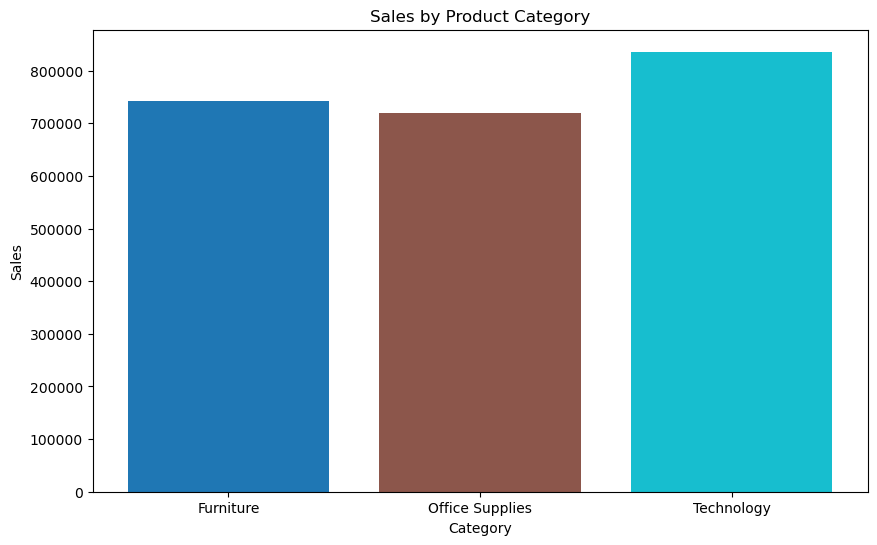

In [11]:
# Execute the query
c.execute('''
SELECT Category, ROUND(SUM(Sales),2) AS 'Category Sales'
FROM OrderDetails
JOIN Products ON OrderDetails.ProductID=Products.ProductID
GROUP BY Products.Category''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Category', 'Category Sales'])

# Get colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', len(df))

# Create a bar chart with 'tab10' colors
plt.figure(figsize=(10,6))
plt.bar(df['Category'], df['Category Sales'], color=[colors(i) for i in range(len(df))])
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales by Product Category')
plt.show()




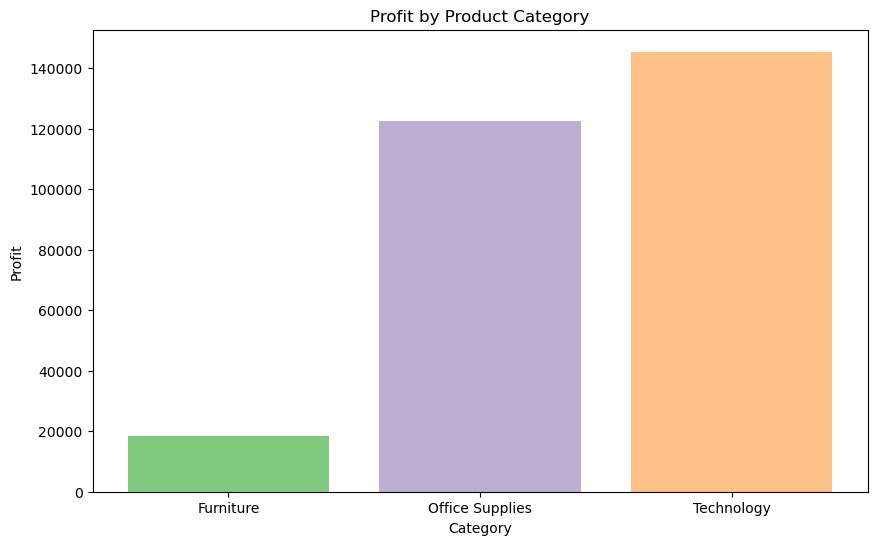

In [19]:
# Execute the query
c.execute('''
SELECT Category, ROUND(SUM(Profit),2) AS 'Category Profit'
FROM OrderDetails
JOIN Products ON OrderDetails.ProductID=Products.ProductID
GROUP BY Products.Category''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Category', 'Category Profit'])

# Get colors from the 'tab10' colormap
colors = plt.colormaps.get_cmap('Accent')

# Create a bar chart with 'tab10' colors
plt.figure(figsize=(10,6))
plt.bar(df['Category'], df['Category Profit'], color=[colors(i) for i in range(len(df))])
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit by Product Category')
plt.show()

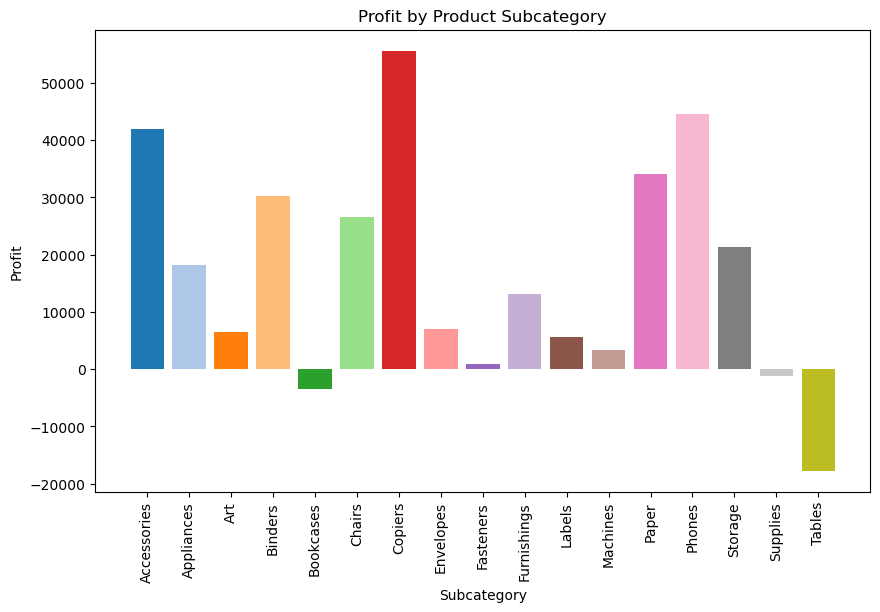

In [22]:
# Execute the query
c.execute('''
SELECT SubCategory, ROUND(SUM(Profit),2) AS 'Subcategory Profit'
FROM OrderDetails
JOIN Products ON OrderDetails.ProductID=Products.ProductID
GROUP BY Products.SubCategory''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Subcategory', 'Subcategory Profit'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab20')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['Subcategory'], df['Subcategory Profit'], color=[colors(i) for i in range(len(df))])
plt.xlabel('Subcategory')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title('Profit by Product Subcategory')
plt.show()

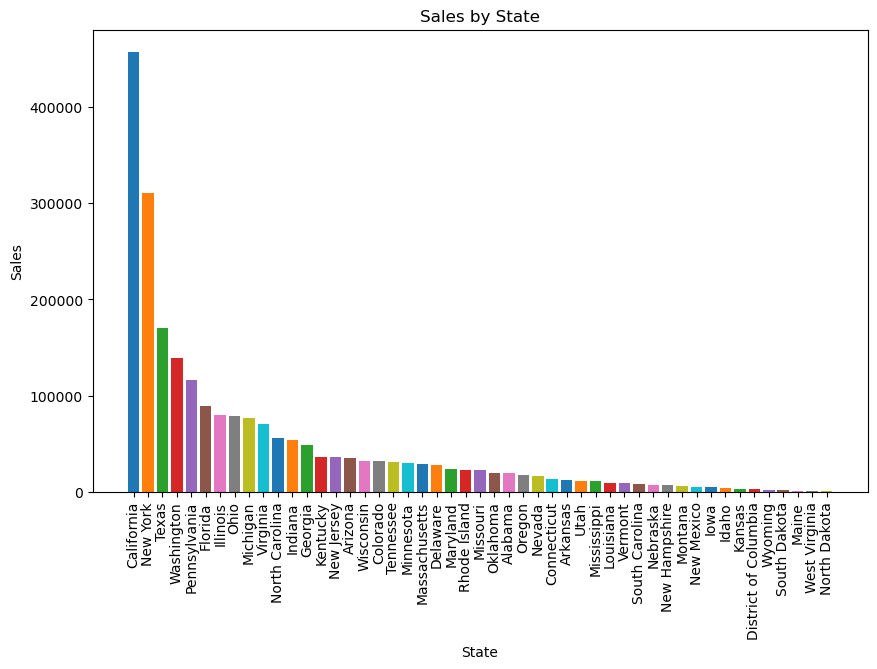

In [25]:
# Execute the query
c.execute('''
SELECT Addresses.State, ROUND(SUM(Sales),2) AS 'State Sales'
FROM OrderDetails
JOIN Orders ON OrderDetails.OrderID=Orders.OrderID
JOIN Addresses ON Addresses.AddressID=Orders.AddressID
GROUP BY Addresses.State
ORDER BY SUM(Sales) DESC''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['State', 'State Sales'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab10')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['State'], df['State Sales'], color=[colors(i % 10) for i in range(len(df))])
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.title('Sales by State')
plt.show()

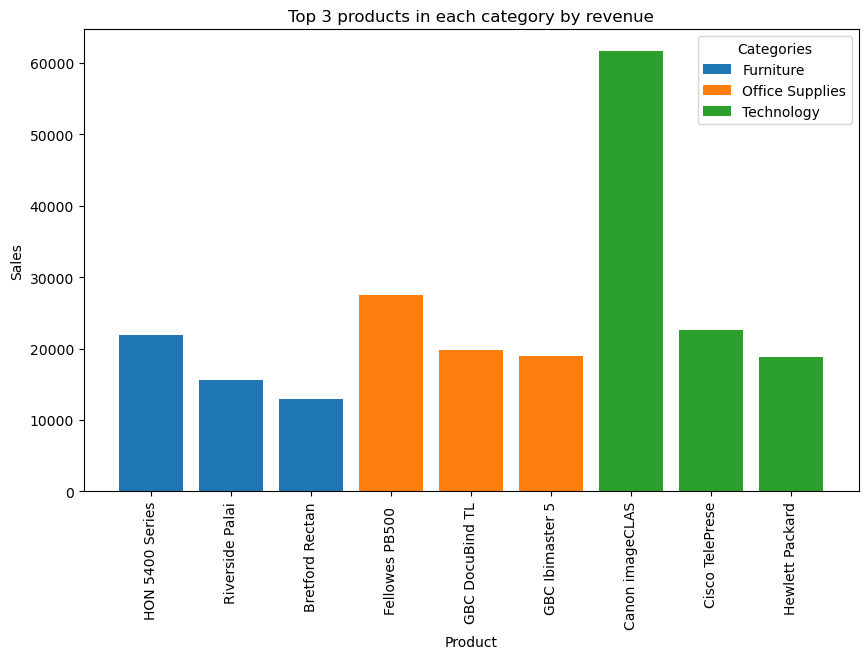

In [38]:
# Execute the query
c.execute('''
SELECT ProductName, Category, ProductSales
FROM (
    SELECT 
        ProductName, 
        Category, 
        ROUND(SUM(Sales),2) AS ProductSales,
        RANK() OVER (PARTITION BY Category ORDER BY SUM(Sales) DESC) as Rank
    FROM Products
    JOIN OrderDetails ON OrderDetails.ProductID = Products.ProductID
	GROUP BY Products.ProductID
) AS RankedProducts
WHERE Rank <= 3
ORDER BY Category, ProductSales DESC;''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Product', 'Category', 'Product Sales'])

# Shorten Product names to 15 characters
df['Product'] = df['Product'].str[:15]

# Map each category to a color
category_colors = {category: colors(i % 10) for i, category in enumerate(df['Category'].unique())}
bar_colors = df['Category'].map(category_colors)

# Create a bar chart with colors based on category
plt.figure(figsize=(10,6))
bars = plt.bar(df['Product'], df['Product Sales'], color=bar_colors)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.title('Top 3 products in each category by revenue')

# Create a legend
legend_elements = [Patch(facecolor=category_colors[cat], label=cat) for cat in category_colors]
plt.legend(handles=legend_elements, title="Categories")

plt.show()


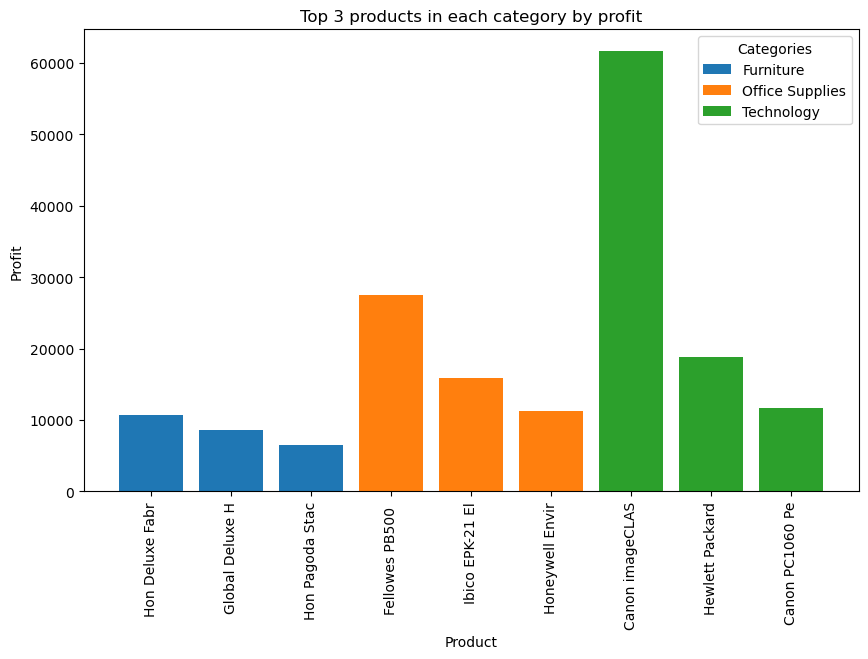

In [39]:
# Execute the query
c.execute('''
SELECT ProductName, Category, ProductProfit
FROM (
    SELECT 
        ProductName, 
        Category, 
        ROUND(SUM(Sales),2) AS ProductProfit,
        RANK() OVER (PARTITION BY Category ORDER BY SUM(Profit) DESC) as Rank
    FROM Products
    JOIN OrderDetails ON OrderDetails.ProductID = Products.ProductID
	GROUP BY Products.ProductID
) AS RankedProducts
WHERE Rank <= 3
ORDER BY Category, ProductProfit DESC;''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Product', 'Category', 'Product Profit'])

# Shorten Product names to 15 characters
df['Product'] = df['Product'].str[:15]

# Map each category to a color
category_colors = {category: colors(i % 10) for i, category in enumerate(df['Category'].unique())}
bar_colors = df['Category'].map(category_colors)

# Create a bar chart with colors based on category
plt.figure(figsize=(10,6))
bars = plt.bar(df['Product'], df['Product Profit'], color=bar_colors)
plt.xlabel('Product')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title('Top 3 products in each category by profit')

# Create a legend
legend_elements = [Patch(facecolor=category_colors[cat], label=cat) for cat in category_colors]
plt.legend(handles=legend_elements, title="Categories")

plt.show()


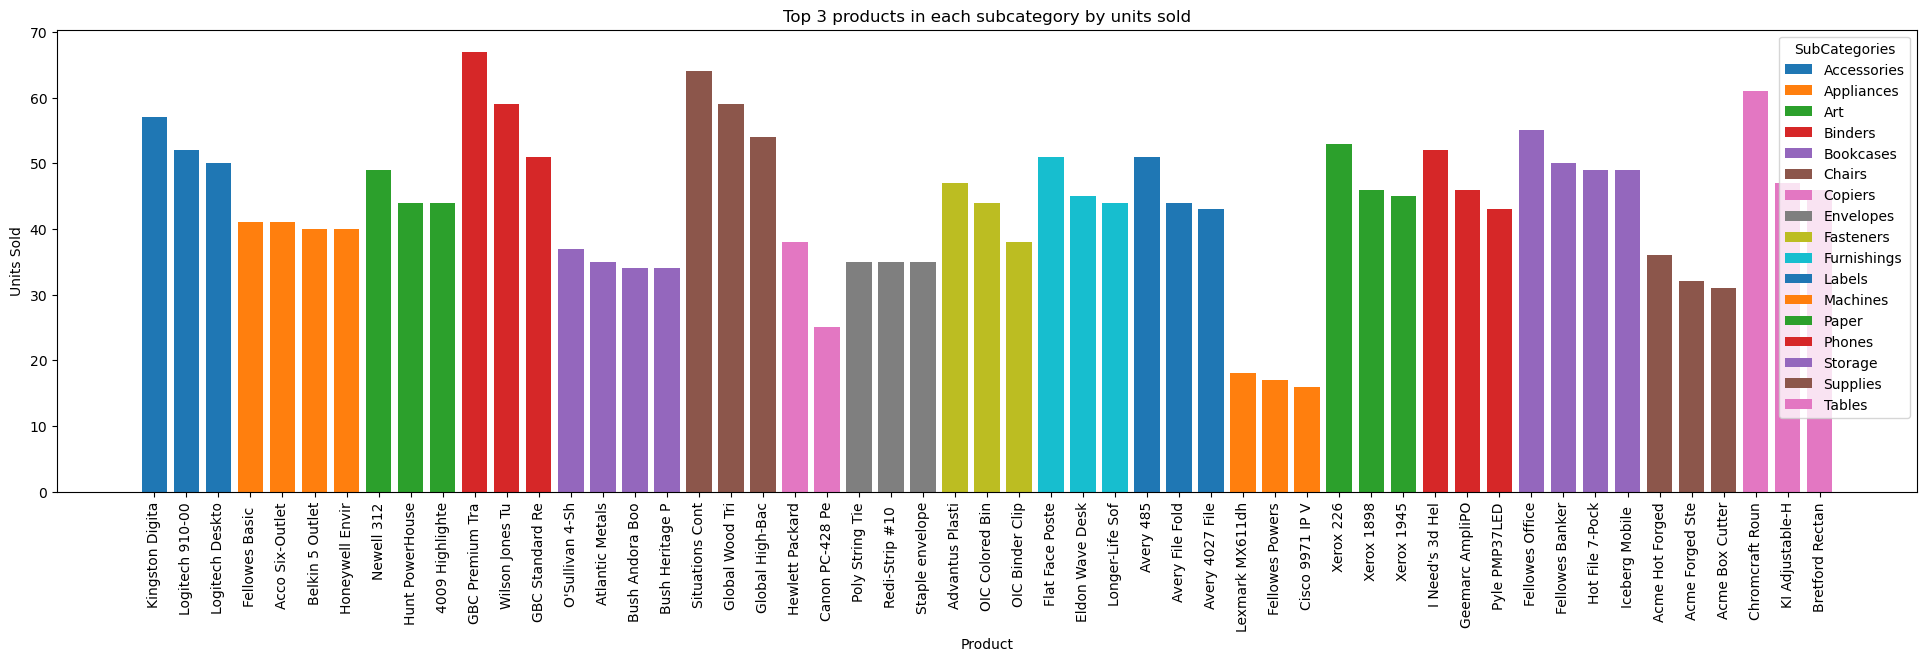

In [44]:
# Execute the query
c.execute('''
SELECT ProductName, SubCategory, UnitsSold
FROM (
	SELECT ProductName, SubCategory, SUM(Quantity) AS UnitsSold,
	RANK() OVER (PARTITION BY SubCategory ORDER BY SUM(Quantity) DESC) AS Rank
	FROM Products
	JOIN OrderDetails ON Products.ProductID=OrderDetails.ProductID
	GROUP BY Products.ProductID
) WHERE Rank <=3
ORDER BY SubCategory, UnitsSold DESC;''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Product', 'SubCategory', 'Units Sold'])

# Shorten Product names to 15 characters
df['Product'] = df['Product'].str[:15]

# Map each category to a color
category_colors = {category: colors(i % 10) for i, category in enumerate(df['SubCategory'].unique())}
bar_colors = df['SubCategory'].map(category_colors)

# Create a bar chart with colors based on category
plt.figure(figsize=(24,6))
bars = plt.bar(df['Product'], df['Units Sold'], color=bar_colors)
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.title('Top 3 products in each subcategory by units sold')

# Create a legend
legend_elements = [Patch(facecolor=category_colors[cat], label=cat) for cat in category_colors]
plt.legend(handles=legend_elements, title="SubCategories")

plt.show()


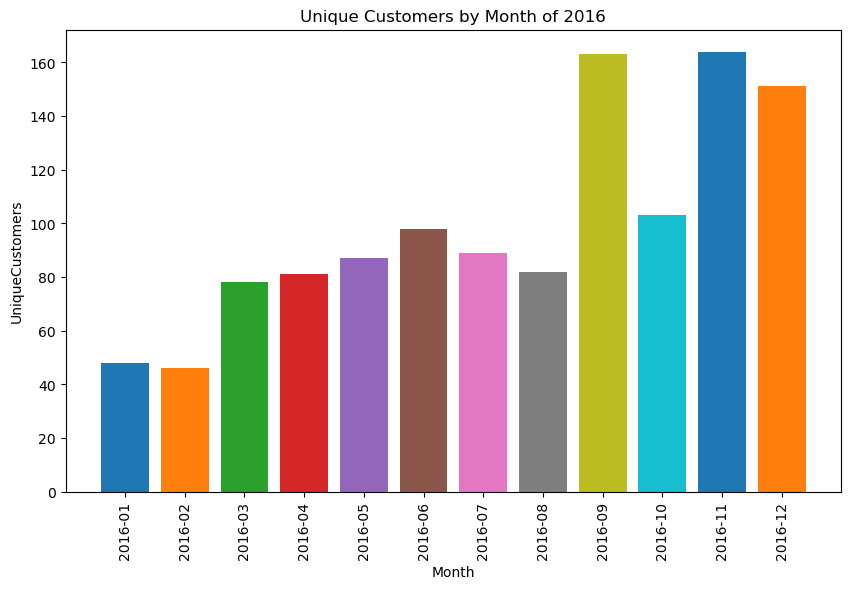

In [45]:
# Execute the query
c.execute('''
SELECT 
    strftime('%Y-%m', OrderDate) AS Month, 
    COUNT(DISTINCT CustomerID) AS UniqueCustomers
FROM 
    Orders
WHERE strftime('%Y', OrderDate) = '2016'
GROUP BY 
    strftime('%Y-%m', OrderDate);''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Month', 'UniqueCustomers'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab10')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['Month'], df['UniqueCustomers'], color=[colors(i % 10) for i in range(len(df))])
plt.xlabel('Month')
plt.ylabel('UniqueCustomers')
plt.xticks(rotation=90)
plt.title('Unique Customers by Month of 2016')

plt.show()


In [47]:
c.close()